Reference:
1. Kinzel, W., and G. Reents (1998). Electrical circuits. In M. Clajus, and B. Freeland-Clajus (Trans.), <i>Physics by computer: Programming physical problems using Mathematica and C</i> (pp. 52-59). New York: Springer (Original work published 1996).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import numpy.fft as fft

## 2.2 Electrical circuits


We consider an alternating voltage $V(t)$ and the corresponding alternating current $I(t)$ and express both as complex-valued functions:

\begin{equation}\label{eq:altvolt}\tag{2.9.1}
    V(t) = V_0 e^{i\omega t}
\end{equation}

\begin{equation}\label{eq:altcurr}\tag{2.9.2}
    I(t) = I_0 e^{i\omega t}
\end{equation}

where $V_0$ and $I_0$ are complex quantities whose phase difference indicates how much the current oscillation precedes or lags behind the voltage oscillation. With Ohm's law:

\begin{equation}\tag{2.10}
    V_0 = ZI_0
\end{equation}

with complex impedance $Z$. For an ohmic resistance $R$, capacitance $C$, and inductance $L$, $Z$ is given by:

\begin{equation}\tag{2.11}
    Z = R = \frac{1}{i\omega C} = i\omega L
\end{equation}

For an $L$-$C$ oscillatory circuit connected in series with a resistance $R$, let $V_i$ and $V_o$ be complex amplitudes of the input & output voltages with angular frequency $\omega$, and let $I_R$, $I_C$, and $I_L$ be the amplitudes of the currents, which, after the transient, have the same frequency as the input voltage. The following equations hold:

\begin{equation}\tag{2.12.1}
    V_R + V_o = V_i
\end{equation}
\begin{equation}\tag{2.12.2}
    I_R = I_C + I_L
\end{equation}
\begin{equation}\tag{2.12.3}
    V_R = RI_R
\end{equation}
\begin{equation}\tag{2.12.4}
    V_o = \frac{1}{i\omega C}I_C
\end{equation}
\begin{equation}\tag{2.12.5}
    V_o = i\omega L I_L
\end{equation}

Independently of $R$, the magnitude of the output voltage $V_o$ always reaches a maximum at $\omega = \frac{1}{LC}$; at this frequency, the impedance of the circuit is infinite.


In [2]:
def Vo(w,R,C,L):
    num = -1j*w*L
    den = -1j*w*L - R + R*C*L*w**2
    func = num/den
    return func,num,den

def phi(func,w,R,C,L):
    return np.arctan(func.imag/func.real)

In [3]:
def polarticks_2(value,tick_number):
    N = int(np.round(2*value/np.pi))
    if N == 0:
        return r"$0$"
    elif N == -1:
        return r"$-\pi/2$"
    elif N == 1:
        return r"$\pi/2$"
    elif N == -2:
        return r"$-\pi$"
    elif N == 2:
        return r"$\pi$"
    elif N%2 < 0:
        return r"$-{0}\frac{\pi}{2}$".format(N)
    elif N%2 > 0 or N%2 < 0:
        return r"${0}\frac{\pi}{2}$".format(N)
    else:
        return r"${0}\pi$".format(N//2)

In [15]:
L = 1e-3 # henries
C = 1e-6 # farads
w = np.linspace(20000,45000,500)
R = np.array([ 100, 300, 900, 2700 ], int)
w_r = 1/np.sqrt(L*C)
w_f = np.linspace(-np.pi/2,np.pi/2,500)

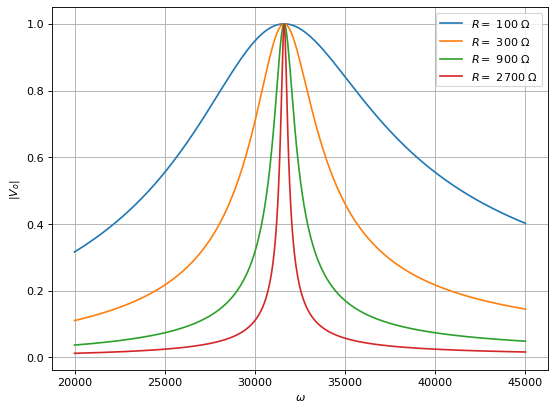

In [16]:
plt.figure(figsize=(8, 6), dpi=80)

plt.xlabel(r"$\omega$")
plt.ylabel(r"$|V_o|$")
for r in R:
    plt.plot(w, abs(Vo(w,r,C,L)[0]), label=r"$R=$ %i $ \Omega$"%r)
plt.legend()
plt.grid()
plt.show()

In [17]:
L = 1e-3 # henries
# C = 1e-6 # farads
C = np.array([0.5e-6, 0.75e-6, 1e-6, 1.25e-6])
w = np.linspace(20000,45000,500)
# R = np.array([ 100, 300, 900, 2700 ], int)
R = 300
w_r = 1/np.sqrt(L*C)
w_f = np.linspace(-np.pi/2,np.pi/2,500)

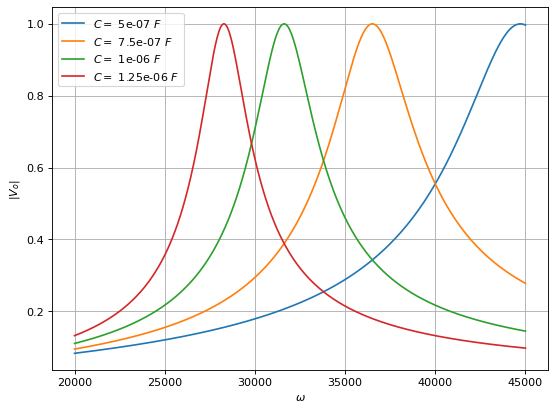

In [18]:
plt.figure(figsize=(8, 6), dpi=80)

plt.xlabel(r"$\omega$")
plt.ylabel(r"$|V_o|$")
for c in C:
    plt.plot(w, abs(Vo(w,R,c,L)[0]), label=r"$C=$ %s $ F$"%c)
plt.legend()
plt.grid()
plt.show()

In [24]:
#L = 1e-3 # henries
L = np.array([1e-3, 1.5e-3, 2.0e-3, 2.5e-3])
C = 1e-6 # farads
#C = np.array([0.5e-6, 0.75e-6, 1e-6, 1.25e-6])
w = np.linspace(20000,45000,500)
# R = np.array([ 100, 300, 900, 2700 ], int)
R = 300
w_r = 1/np.sqrt(L*C)
w_f = np.linspace(-np.pi/2,np.pi/2,500)

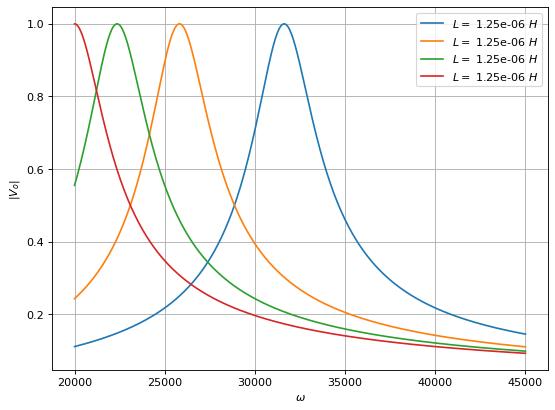

In [25]:
plt.figure(figsize=(8, 6), dpi=80)

plt.xlabel(r"$\omega$")
plt.ylabel(r"$|V_o|$")
for l in L:
    plt.plot(w, abs(Vo(w,R,C,l)[0]), label=r"$L=$ %s $ H$"%c)
plt.legend()
plt.grid()
plt.show()